In [ ]:
import pandas as pd
import os
from tqdm import tqdm

import nltk
import numpy as np
import string
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
!pip install tqdm

# Load data

## Get email data

In [ ]:
filepath = "C://Users/Shebna/Desktop/Code/trec06p/data/"

In [ ]:
def get_fileLoc(dirpath,file_name):
    file_loc = '..'+ dirpath.split('trec06p')[1] + '/' + file_name
    return file_loc

dict_list = []
for dirpath, dirnames, files in os.walk(filepath):
    print(f'Found directory: {dirpath}')
    if(len(files) == 0):
        continue
    for file_name in files:
        dict_df = dict()
        print(file_name)
        dir_file_name = dirpath + '/' + file_name
        f = open(dir_file_name, "r", encoding="utf8", errors='ignore')
        file_content = f.read()
        f.close()
        content = file_content.partition("\n\n")[2]
        dict_df['content'] = content
        dict_df['file_location'] = get_fileLoc(dirpath,file_name)
        dict_list.append(dict_df)
#         print(a)
#         break
#     break
    
print(dict_df)

## Create email data dataframe

In [ ]:
df = pd.DataFrame(dict_list)
df.shape

(37822, 2)

In [ ]:
df.head()

,content,file_location
0,The mailing list I queried about a few weeks a...,../data/000/000
1,----6847392600180172994\nContent-Type: text/pl...,../data/000/001
2,Academic Qualifications available from prestig...,../data/000/002
3,Greetings all. This is to verify your subscri...,../data/000/003
4,This is a multi-part message in MIME format.\n...,../data/000/004


# Preprocessing

In [ ]:
import gensim
from gensim.utils import lemmatize, simple_preprocess
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize


def sent_to_words(sent):
    # Remove newline chars
    sent = re.sub('\s+', ' ', sent)  
    # Remove single quotes
    sent = re.sub("\'", "", sent)   

    # Remove HTML
    res = BeautifulSoup(sent,'html.parser').get_text()
    
    # Tokenize
    tok_res = word_tokenize(res)
    
    # Lowercase
    tok_res = [item.lower() for item in tok_res]
    
    
    return tok_res  


tqdm.pandas()
df['tokens'] = df['content'].progress_apply(lambda x: sent_to_words(x))

C:\Users\Shebna\anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel






  0%|          | 0/37822 [00:00<?, ?it/s]





  0%|          | 6/37822 [00:00<10:47, 58.41it/s]





  0%|          | 20/37822 [00:00<08:57, 70.38it/s]





  0%|          | 33/37822 [00:00<08:51, 71.15it/s]





  0%|          | 45/37822 [00:00<07:58, 78.94it/s]





  0%|          | 53/37822 [00:00<08:34, 73.43it/s]





  0%|          | 63/37822 [00:00<07:55, 79.47it/s]





  0%|          | 86/37822 [00:00<06:23, 98.28it/s]





  0%|          | 103/37822 [00:00<05:36, 112.14it/s]





  0%|          | 119/37822 [00:01<05:16, 119.15it/s]





  0%|          | 134/37822 [00:01<05:17, 118.65it/s]





  0%|          | 148/37822 [00:01<05:06, 122.79it/s]





  0%|          | 164/37822 [00:01<04:47, 130.95it/s]





  0%|          | 178/37822 [00:01<04:55,

### Remove punctuations

In [ ]:
def remove_punc(tokenized_sent):
    filtered_sent=[]
    for w in tokenized_sent:
        if (w.isalpha()) and (w not in string.punctuation) :
            filtered_sent.append(w)
    return filtered_sent

tqdm.pandas()
df['tokens'] = df['tokens'].progress_apply(lambda x: remove_punc(x))







  0%|          | 0/37822 [00:00<?, ?it/s]





  2%|▏         | 731/37822 [00:00<00:05, 7256.96it/s]





  3%|▎         | 1302/37822 [00:00<00:05, 6647.58it/s]





  4%|▍         | 1622/37822 [00:00<00:10, 3557.70it/s]





  6%|▌         | 2317/37822 [00:00<00:08, 4166.19it/s]





  8%|▊         | 3092/37822 [00:00<00:07, 4835.01it/s]





 10%|▉         | 3620/37822 [00:00<00:06, 4949.80it/s]





 11%|█         | 4136/37822 [00:00<00:08, 3745.44it/s]





 13%|█▎        | 4773/37822 [00:01<00:07, 4267.42it/s]





 14%|█▍        | 5266/37822 [00:01<00:07, 4157.97it/s]





 15%|█▌        | 5729/37822 [00:01<00:07, 4217.91it/s]





 16%|█▋        | 6189/37822 [00:01<00:07, 4316.79it/s]





 18%|█▊        | 6645/37822 [00:01<00:07, 4219.83it/s]





 19%|█▊        | 7084/37822 [00:01<00:07, 3924.12it/s]





 20%|█▉        | 7545/37822 [00:01<00:07, 4104.75it/s]





 21%|██        | 7969/37822 [00:01<00:07, 3940.00it/s]





 22%|██▏       | 8442/37822 [00:01<00:07, 4139.8

### Remove stop words

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words=set(stopwords.words("english"))
print(stop_words)

{"didn't", 'own', 'from', 'had', 'has', "wouldn't", "shouldn't", 'can', 'i', "doesn't", 'being', 'with', 'those', 'again', 'him', 'some', 't', 'll', 'hasn', "needn't", 'haven', 'his', "you've", 'whom', 'herself', 'until', 'shouldn', 'here', 'himself', 'very', 'down', 'wasn', 'them', 'have', 'so', 'both', 'mustn', 'what', 'mightn', 'will', 'before', "couldn't", "you're", 've', 'same', "that'll", 'they', 'out', 'won', 'having', 'does', 'be', 'needn', 'when', 'your', 'don', 'are', "wasn't", 'these', 'as', 'than', "you'd", 'where', 'on', 'and', 'weren', "haven't", 'a', 'theirs', 'further', 'most', 'why', "hasn't", 'few', 'did', 'for', "should've", 'doesn', 'that', 'more', 'but', 'too', 'in', 'between', "hadn't", 'me', 'm', 'while', 'over', 's', 'through', 'was', 'each', 'o', 'who', 'should', 'were', 'aren', 'ma', "mightn't", 'there', 'you', 'or', 'below', 'off', 'after', 'am', 'to', 'their', 'all', 'how', 'up', "you'll", 'any', 'then', 'into', 'myself', 'nor', 'an', "shan't", "weren't", 'd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shebna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopWords(tokenized_sent):
    filtered_sent=[]
    symbols = ['']
    for w in tokenized_sent:
        if (w not in stop_words) and (len(w) > 2) :
            filtered_sent.append(w)
    return filtered_sent

tqdm.pandas()
df['tokens'] = df['tokens'].progress_apply(lambda x: remove_stopWords(x))







  0%|          | 0/37822 [00:00<?, ?it/s]





  2%|▏         | 768/37822 [00:00<00:04, 7476.23it/s]





  3%|▎         | 1319/37822 [00:00<00:06, 5676.40it/s]





  4%|▍         | 1586/37822 [00:00<00:08, 4073.95it/s]





  7%|▋         | 2788/37822 [00:00<00:06, 5076.91it/s]





 10%|▉         | 3746/37822 [00:00<00:06, 5271.01it/s]





 12%|█▏        | 4714/37822 [00:00<00:05, 6102.40it/s]





 15%|█▌        | 5754/37822 [00:00<00:04, 6955.80it/s]





 18%|█▊        | 6689/37822 [00:00<00:04, 7521.27it/s]





 20%|█▉        | 7516/37822 [00:01<00:04, 7385.56it/s]





 23%|██▎       | 8726/37822 [00:01<00:03, 8350.50it/s]





 26%|██▋       | 9998/37822 [00:01<00:02, 9295.04it/s]





 31%|███       | 11705/37822 [00:01<00:02, 10751.31it/s]





 35%|███▌      | 13391/37822 [00:01<00:02, 12043.55it/s]





 39%|███▉      | 14749/37822 [00:01<00:01, 11733.80it/s]





 42%|████▏     | 16032/37822 [00:01<00:01, 11201.55it/s]





 46%|████▌     | 17234/37822 [00:01<00:0

# Create labels dataframe

In [ ]:
label_path = "C://Users/Shebna/Desktop/Code/trec06p/labels"
f = open(label_path, "r", encoding="utf8", errors='ignore')
Lines = f.readlines() 
  
count = 0
# Strips the newline character 
label_list = []
for line in Lines: 
    label_dict = {}
#     print("Line{}: {}".format(count, line.strip())) 
    label_dict['label'] = line.split()[0]
    label_dict['file_location'] = line.split()[1]
    label_list.append(label_dict)
    count+=1

In [ ]:
label_df = pd.DataFrame(label_list)
label_df.shape

(37822, 2)

# Merge data and label into one dataframe

In [ ]:
merged_df = pd.merge(df, label_df)

In [ ]:
merged_df.isna().sum()

content          0
file_location    0
tokens           0
label            0
dtype: int64

In [ ]:
merged_df.tail()

,content,file_location,tokens,label
37817,Great News Expec ted!\n\nInfinex Ventures Inc....,../data/126/017,"[great, news, expec, ted, infinex, ventures, i...",spam
37818,The OIL sector is going crazy. This is our wee...,../data/126/018,"[oil, sector, going, crazy, weekly, gift, get,...",spam
37819,http://vdtobj.docscan.info/?23759301\n\nSuffer...,../data/126/019,"[http, suffering, pain, depression, heartburn,...",spam
37820,U N I V E R S I T Y D I P L O M A S\n\nDo you...,../data/126/020,"[want, prosperous, future, increased, money, e...",spam
37821,This is a multi-part message in MIME format.\n...,../data/126/021,"[message, mime, format, moat, coverall, cytoch...",spam


In [ ]:
merged_df.to_csv('data_W_labels.csv',index=False)

# Visualize frequency

In [ ]:
l = merged_df['tokens'].values.tolist()
# l = dw2
flat_list = [item for sublist in l for item in sublist]
len(flat_list)


4252369

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(flat_list)
print(fdist)

<FreqDist with 100498 samples and 4252369 outcomes>


In [ ]:
fdist.most_common(100)

[('http', 33302),
 ('message', 18467),
 ('one', 17069),
 ('would', 14771),
 ('get', 13616),
 ('price', 13008),
 ('may', 12275),
 ('aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
  12241),
 ('like', 11892),
 ('use', 11865),
 ('format', 11196),
 ('also', 11149),
 ('received', 11048),
 ('please', 10921),
 ('new', 10636),
 ('time', 10397),
 ('mime', 10309),
 ('subject', 10100),
 ('list', 9851),
 ('adobe', 9802),
 ('info', 9798),
 ('dmdx', 9699),
 ('company', 9606),
 ('date', 9507),
 ('aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 9384),
 ('information', 9381),
 ('could', 8862),
 ('see', 8754),
 ('vulnerable', 8709),
 ('windows', 8575),
 ('microsoft', 8540),
 ('help', 8306),
 ('using', 8200),
 ('file', 8118),
 ('email', 8101),
 ('dont', 7991),
 ('gold', 7895),
 ('office', 7713),
 ('know', 7703),
 ('campaign', 7613),
 ('professional', 7517),
 ('want', 7478),
 ('number', 7466),
 ('used', 7349),
 ('need', 7259),
 ('make', 7113),
 ('wrote', 7047),
 (

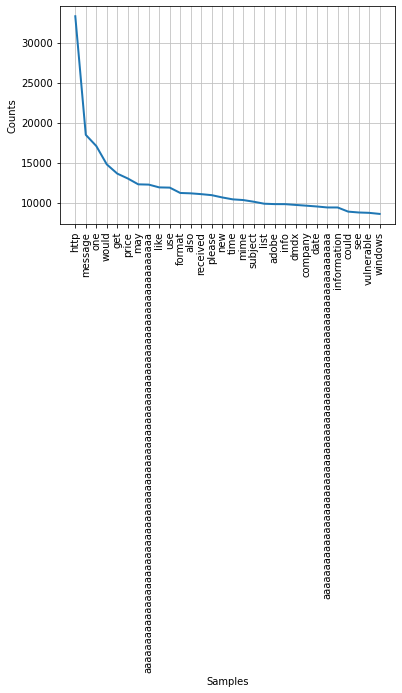

In [ ]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

# Split Data

In [ ]:
train_df = merged_df.sample(frac=0.6,random_state=42)
test_df= merged_df.drop(train_df.index)

In [ ]:
train_df

,content,file_location,tokens,label
36107,>do you feel comfortable enough with Purify th...,../data/120/107,"[do, you, feel, comfortable, enough, with, pur...",ham
18363,Maybe somebody could help.\nI am try to use th...,../data/061/063,"[maybe, somebody, could, help, i, am, try, to,...",ham
17277,Hello -\nI'm having some trouble figuring out ...,../data/057/177,"[hello, im, having, some, trouble, figuring, o...",ham
1640,TWVtYmVycywNCg0KUmVzb3J0IEN8dWJzIHxudGVybmF0aW...,../data/005/140,[],spam
24679,This is a multi-part message in MIME format.\n...,../data/082/079,"[this, is, a, message, in, mime, format, it, b...",spam
...,...,...,...,...
29945,"$B""#""!40A4L5NA!*!*<j7Z$K2?=h$G$b""v!!Nx?M(Bor...",../data/099/245,"[b, a, d, h, b, b, bo, b, b, b, b, b, bmens, b...",spam
35445,This is a multi-part message in MIME format.\n...,../data/118/045,"[this, is, a, message, in, mime, format, d, z,...",spam
1286,"Dear Homeowner, \nsuresh@flamingo.stanford.ed...",../data/004/086,"[dear, homeowner, suresh, http, you, have, bee...",spam
32235,<!-- saved from url=(0022)http://internet.e-ma...,../data/107/135,"[the, china, international, consumer, goods, f...",spam


In [ ]:
# Test if there are duplicates
df_series = test_df.index.to_series()
df_series.append(train_df.index.to_series())

df_series.duplicated().sum()

0

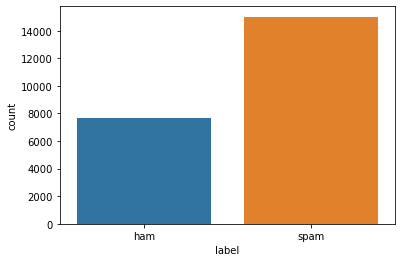

In [ ]:
sns.countplot(x='label', data=train_df)

In [ ]:
# Probability of Ham
ham_counts = len(train_df[train_df['label'] == 'ham'])
total_counts = len(train_df['label'])
prob_ham = ham_counts / total_counts
prob_ham


0.3381659542590226

In [ ]:
# Probability of Spam
spam_counts = len(train_df[train_df['label'] == 'spam'])
total_counts = len(train_df['label'])
prob_spam = spam_counts / total_counts
prob_spam

0.6618340457409774

In [ ]:
# In the ham universe, how many times did word x occur?
train_ham = train_df[train_df['label'] == 'ham']

In [ ]:
from nltk.probability import FreqDist

l = train_ham['tokens'].values.tolist()
flat_list = [item for sublist in l for item in sublist]
print(len(flat_list))

fdist_train_ham = FreqDist(flat_list)
print(fdist_train_ham)

train_ham_vocab = pd.DataFrame(fdist_train_ham.items(), columns=['word', 'frequency'])

2583063
<FreqDist with 61437 samples and 2583063 outcomes>


# Vocabulary Training Set

In [ ]:
from nltk.probability import FreqDist

l = train_df['tokens'].values.tolist()
flat_list = [item for sublist in l for item in sublist]
print(len(flat_list))

fdist_train = FreqDist(flat_list)
print(fdist_train)

4634619
<FreqDist with 78616 samples and 4634619 outcomes>


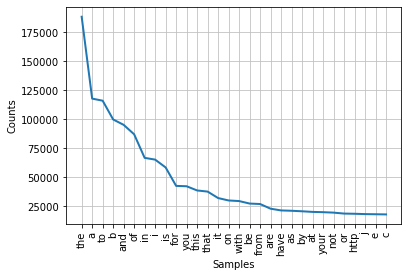

In [ ]:
import matplotlib.pyplot as plt
fdist_train.plot(30,cumulative=False)
plt.show()

## Get the most common words for vocabulary

In [ ]:
fdist_train = fdist_train.most_common(10000)

In [ ]:
train_vocab = pd.DataFrame(fdist_train, columns=['word', 'frequency'])


In [ ]:
train_vocab

,word,frequency
0,the,188436
1,a,117834
2,to,116036
3,b,99848
4,and,95198
...,...,...
9995,eo,24
9996,lending,24
9997,efficacy,24
9998,sipp,24


# Computing spam likelihood conditionals

In [ ]:
train_spam = train_df[train_df['label'] == 'spam']
train_word_list = train_vocab['word'].tolist()
spam_doc_list = train_spam['tokens']
train_word_doc_freq = {}
for w in tqdm(train_word_list):
    count=0
    for doc in spam_doc_list:
        if w in doc:
            count+=1
    train_word_doc_freq[w] = count

    

100%|██████████| 10000/10000 [10:21<00:00, 16.09it/s]


## Remove most frequent words

In [ ]:
train_spam_cond = pd.DataFrame(train_word_doc_freq.items(), columns=['word', 'doc_counts'])

In [ ]:
train_spam_cond['conditional_probability'] = train_spam_cond['doc_counts'].apply(lambda x: x/spam_counts)

# Lambda Smoothing Spam

In [ ]:
vocab_size = len(train_vocab)
lambda_val = 0
train_spam_cond['doc_counts_lambda_smoothing'] = train_spam_cond['doc_counts'].apply(lambda x: x+lambda_val)
train_spam_cond['conditional_probability_lambda'] = train_spam_cond['doc_counts'].apply(lambda x: x/(spam_counts + (lambda_val * vocab_size)))

In [ ]:
train_spam_cond

,word,doc_counts,conditional_probability,doc_counts_lambda_smoothing,conditional_probability_lambda
0,the,7196,0.479126,7196.005,0.477537
1,a,10685,0.711432,10685.005,0.709072
2,to,7777,0.517811,7777.005,0.516093
3,b,3866,0.257407,3866.005,0.256553
4,and,7376,0.491111,7376.005,0.489482
...,...,...,...,...,...
9995,eo,14,0.000932,14.005,0.000929
9996,lending,2,0.000133,2.005,0.000133
9997,efficacy,13,0.000866,13.005,0.000863
9998,sipp,0,0.000000,0.005,0.000000


In [ ]:
def word_given_spam(test_doc_list):
    spam_map = pd.Series(train_spam_cond['conditional_probability_lambda'].values,index=train_spam_cond['word']).to_dict()
    d = test_doc_list
    values_to_log = []
    for v in train_word_list:
        if v in d:
            value = spam_map[v]
            values_to_log.append(value)
        else:
            value  = 1 - spam_map[v]
            values_to_log.append(value)
                
    return values_to_log

spam_values_to_log = word_given_spam(['the','a','to'])

In [ ]:
def log_and_exponentiate(values_to_log):
    logged_vals = np.log10(values_to_log)
    summed_up = np.sum(logged_vals)
    
    return 10**summed_up


# Ham Conditionals

In [ ]:
train_ham = train_df[train_df['label'] == 'ham']
train_word_list = train_vocab['word'].tolist()
ham_doc_list = train_ham['tokens']
train_ham_word_doc_freq = {}
for w in tqdm(train_word_list):
    count=0
    for doc in ham_doc_list:
        if w in doc:
            count+=1
    train_ham_word_doc_freq[w] = count

100%|██████████| 10000/10000 [10:04<00:00, 16.53it/s]


In [ ]:
train_ham_cond = pd.DataFrame(train_ham_word_doc_freq.items(), columns=['word', 'doc_counts'])
train_ham_cond['conditional_probability'] = train_ham_cond['doc_counts'].apply(lambda x: x/ham_counts)

# Lambda Smoothing Ham

In [ ]:
vocab_size = len(train_vocab)
lambda_val = 0
train_ham_cond['doc_counts_lambda_smoothing'] = train_ham_cond['doc_counts'].apply(lambda x: x+lambda_val)
train_ham_cond['conditional_probability_lambda'] = train_ham_cond['doc_counts'].apply(lambda x: x/(ham_counts + (lambda_val * vocab_size)))

In [ ]:
train_ham_cond

,word,doc_counts,conditional_probability,doc_counts_lambda_smoothing,conditional_probability_lambda
0,the,6980,0.909565,6980.1,0.804704
1,a,6314,0.822778,6314.1,0.727923
2,to,6686,0.871254,6686.1,0.770809
3,b,334,0.043524,334.1,0.038506
4,and,6018,0.784206,6018.1,0.693798
...,...,...,...,...,...
9995,eo,4,0.000521,4.1,0.000461
9996,lending,6,0.000782,6.1,0.000692
9997,efficacy,6,0.000782,6.1,0.000692
9998,sipp,3,0.000391,3.1,0.000346


In [ ]:
def word_given_ham(test_doc_list):
    ham_map = pd.Series(train_ham_cond['conditional_probability_lambda'].values,index=train_ham_cond['word']).to_dict()
    d = test_doc_list
    values_to_log = []
    for v in train_word_list:
        if v in d:
            value = ham_map[v]
            values_to_log.append(value)
        else:
            value  = 1 - ham_map[v]
            values_to_log.append(value)
                
    return values_to_log

ham_values_to_log = word_given_ham(['the','a','to'])

In [ ]:
def log_and_exponentiate(values_to_log):
    logged_vals = np.log10(values_to_log)
    summed_up = np.sum(logged_vals)
    
    return 10**summed_up


6.408383240523945e-05

# Naive Bayes Algorithm

In [ ]:
def predict_nb(spam_or_ham,doc):
    spam_values_to_log = word_given_spam(doc)
    likelihood_spam = log_and_exponentiate(spam_values_to_log) * prob_spam
    
    ham_values_to_log = word_given_ham(doc)
    likelihood_ham = log_and_exponentiate(ham_values_to_log) * prob_ham
    
    
    if spam_or_ham == 'S':
        result = np.divide(likelihood_spam,(likelihood_spam + likelihood_ham))
    elif spam_or_ham == 'H':
        result = np.divide(likelihood_ham,(likelihood_ham + likelihood_spam))
    else:
        print("Please enter 'S' or 'H' for first parameter")
        return

    

    return result

1.0

In [ ]:
def classify_text(text):
    spam_r = predict_nb('S',text)
    ham_r = predict_nb('H',text)
    

    if spam_r >= ham_r:
#         print('Predicted label: Spam')
        return 'spam'
    elif spam_r < ham_r:
#         print('Predicted label: Ham')
        return 'ham'
    else:
#         print('Predicted label: Equally spam or ham')
        return

'spam'

In [ ]:
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

def predict_labels(text_list):
    predictions = []
    
    for text in tqdm(text_list):
        predicted_label = classify_text(text)
        predictions.append(predicted_label)
    return predictions

predicted_labels = predict_labels(test_df['tokens'])

<ipython-input-394-9ad5d68e5ff2>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()


C:\Users\Shebna\anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
<ipython-input-394-9ad5d68e5ff2>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for text in tqdm(text_list):


<ipython-input-121-0575c1372525>:2: RuntimeWarning: divide by zero encountered in log10
  logged_vals = np.log10(values_to_log)
<ipython-input-190-d783a3b39cd0>:14: RuntimeWarning: invalid value encountered in true_divide
  result = np.divide(likelihood_spam,(likelihood_spam + likelihood_ham))
<ipython-input-190-d783a3b39cd0>:18: RuntimeWarning: invalid value encountered in true_divide
  result = np.divide(likelihood_ham,(likelihood_ham + likelihood_spam))


In [ ]:
actual_labels = test_df['label'].tolist()
actual_labels

['spam',
 'spam',
 'ham',
 'spam',
 'ham',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'spam',
 'spam',
 'ham',
 'ham',
 'ham',
 'spam',
 'spam',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam',
 'spam',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 '

# Metrics

In [ ]:
def metrics_parameters(y_actual, y_pred):
    class_id = {'spam','ham'}

    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return TP[0], FP[0], TN[0], FN[0]

In [ ]:
TP, FP, TN, FN = metrics_parameters(actual_labels,predicted_labels)
print(TP)
print(FP)
print(TN)
print(FN)

9177
414
4372
1166


## Precision

In [ ]:
precision = TP/(TP+FP)
precision

0.9568345323741008

## Recall

In [ ]:
recall = TP/(TP+FN)
recall

0.8872667504592479

## Accuracy

In [ ]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.8954987110846718

# Lambda Smoothing

In [ ]:
lambda_experiments = {}
lambda_experiments['0.005'] = {'precision': precision,
                           'recall': recall,
                            'accuracy': accuracy
                          }

In [ ]:
lambda_experiments

{'0.005': {'precision': 0.9570296203587818,
  'recall': 0.8869985500241663,
  'accuracy': 0.8954987110846718}}

### Lambda experiment values

In [ ]:
{'2.0': {'precision': 0.9833126620814071,
  'recall': 0.8190270473328325,
  'accuracy': 0.8628461894375041}}
{'1.0': {'precision': 0.979808010592519,
  'recall': 0.8437856328392246,
  'accuracy': 0.8792385484830458}}
{'0.5': {'precision': 0.9719534732036091,
  'recall': 0.856253591266041,
  'accuracy': 0.8837332275761782}}
{'0.1': {'precision': 0.9593999160721779,
  'recall': 0.8823813199536858,
  'accuracy': 0.893846255535726}}
{'0.005': {'precision': 0.9570296203587818,
  'recall': 0.8869985500241663,
  'accuracy': 0.
           987110846718}}

### Visualizing Metrics

In [ ]:
m_filepath = 'C://Users/Shebna/Desktop/Code/results/'

In [ ]:
metrics_df = pd.read_csv(m_filepath + 'metric_vals_vocab.csv')
metrics_df.columns = ['Vocabulary Size','Metric','Performance']

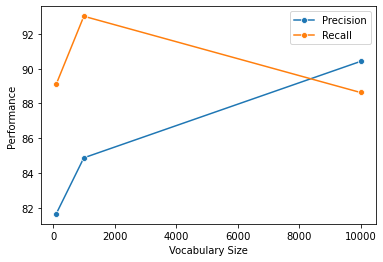

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()

sns.lineplot(data=metrics_df, x="Vocabulary Size", y="Performance", hue="Metric", marker='o')
ax.legend(["Precision","Recall"])
